In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Setup**

In [ ]:
import os 
import re
import zipfile 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil 
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
processedDataset = pd.read_csv("/content/drive/MyDrive/41_softCom_project/training_data.csv")

In [ ]:
processedDataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1.0,1,1,1,1.0,21,4.5,3.5,1,36,1.0
1,29725,40,0.776,1.0,0,1,1,1.0,15,1.0,1.0,2,47,0.0
2,11561,21,0.624,1.5,0,3,1,1.0,5,4.5,3.5,0,83,0.0
3,33241,115,0.789,1.5,0,4,1,2.0,0,4.5,1.0,0,52,1.0
4,666,162,0.767,1.0,1,1,2,1.0,21,1.0,2.0,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,173,0.878,1.0,0,1,1,4.0,14,4.5,3.5,1,42,1.0
19154,31398,103,0.920,1.0,1,1,1,1.0,14,4.5,3.5,4,52,1.0
19155,24576,103,0.920,1.0,1,1,1,1.0,21,1.0,1.0,4,44,0.0
19156,5756,65,0.802,1.0,1,1,3,3.5,0,8.0,1.0,6,97,0.0


In [ ]:
processedDataset.shape

(19158, 14)

In [ ]:
processedDataset = processedDataset.drop(columns=['enrollee_id'])

In [ ]:
processedDataset

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,1.0,1,1,1,1.0,21,4.5,3.5,1,36,1.0
1,40,0.776,1.0,0,1,1,1.0,15,1.0,1.0,2,47,0.0
2,21,0.624,1.5,0,3,1,1.0,5,4.5,3.5,0,83,0.0
3,115,0.789,1.5,0,4,1,2.0,0,4.5,1.0,0,52,1.0
4,162,0.767,1.0,1,1,2,1.0,21,1.0,2.0,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,1.0,0,1,1,4.0,14,4.5,3.5,1,42,1.0
19154,103,0.920,1.0,1,1,1,1.0,14,4.5,3.5,4,52,1.0
19155,103,0.920,1.0,1,1,1,1.0,21,1.0,1.0,4,44,0.0
19156,65,0.802,1.0,1,1,3,3.5,0,8.0,1.0,6,97,0.0


In [ ]:
#processedDataset['split'] = np.random.randn(processedDataset.shape[0], 1)
msk = np.random.rand(len(processedDataset)) <= 0.9
trainDataset = processedDataset[msk]
testDataset = processedDataset[~msk]

In [ ]:
trainDataset.head()


,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,1.0,1,1,1,1.0,21,4.5,3.5,1,36,1.0
1,40,0.776,1.0,0,1,1,1.0,15,1.0,1.0,2,47,0.0
3,115,0.789,1.5,0,4,1,2.0,0,4.5,1.0,0,52,1.0
4,162,0.767,1.0,1,1,2,1.0,21,1.0,2.0,4,8,0.0
5,176,0.764,1.5,1,2,1,1.0,11,4.5,3.5,1,24,1.0


In [ ]:
trainDataset.shape

(17274, 13)

In [ ]:
testDataset.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,21,0.624,1.5,0,3,1,1.0,5,4.5,3.5,0,83,0.0
21,114,0.926,1.0,1,1,2,1.0,11,7.0,1.0,6,50,0.0
22,102,0.804,1.5,1,1,2,1.0,10,4.5,3.5,1,48,0.0
49,83,0.923,1.0,1,1,1,1.0,11,6.0,1.0,1,21,0.0
57,103,0.920,1.0,1,1,1,1.0,21,4.5,3.5,6,19,0.0


In [ ]:
testDataset.shape

(1884, 13)

# **Train 90 validation 10 Split**

In [ ]:
NormalizedDataset = np.float32(trainDataset.loc[:, trainDataset.columns != "target"].values)

In [ ]:
NormalizedDataset

array([[103.   ,   0.92 ,   1.   , ...,   3.5  ,   1.   ,  36.   ],
       [ 40.   ,   0.776,   1.   , ...,   1.   ,   2.   ,  47.   ],
       [115.   ,   0.789,   1.5  , ...,   1.   ,   0.   ,  52.   ],
       ...,
       [103.   ,   0.92 ,   1.   , ...,   1.   ,   4.   ,  44.   ],
       [ 65.   ,   0.802,   1.   , ...,   1.   ,   6.   ,  97.   ],
       [ 67.   ,   0.855,   1.5  , ...,   3.5  ,   1.   , 127.   ]],
      dtype=float32)

In [ ]:
NormalizedDataset.shape

(17274, 12)

In [ ]:
labels = trainDataset.target.values

In [ ]:
labels.shape

(17274,)

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(NormalizedDataset, labels, test_size=0.1, random_state=42)


**here test set is the validation set**

In [ ]:
print(len(train_data), len(test_data))

15546 1728


In [ ]:
train_data = torch.from_numpy(train_data)
train_label = torch.from_numpy(train_label).type(torch.LongTensor)

test_data = torch.from_numpy(test_data)
test_label = torch.from_numpy(test_label).type(torch.LongTensor)




In [ ]:
train_data

tensor([[ 39.0000,   0.8980,   1.5000,  ...,   1.0000,   2.0000, 146.0000],
        [ 75.0000,   0.9390,   1.0000,  ...,   1.0000,   6.0000,  21.0000],
        [ 21.0000,   0.6240,   1.5000,  ...,   1.0000,   1.0000,  91.0000],
        ...,
        [ 21.0000,   0.6240,   1.0000,  ...,   1.0000,   1.0000, 135.0000],
        [160.0000,   0.9200,   1.5000,  ...,   5.0000,   2.0000,  19.0000],
        [103.0000,   0.9200,   2.0000,  ...,   3.5000,   0.0000,  12.0000]])

In [ ]:
train_data.shape


torch.Size([15546, 12])

In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

# **Experiments**

# **Experiment 1**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import time
import torch
import torch.nn.functional as F


# import libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import time
import torch
import torch.nn.functional as F

#**final Setup from setup 24  Neural Network with 24 nodes and 9 hidden layers with ReLU Activation**


| Hyper Parameters       | Values     | 
| :------------- | :----------: | 
|  batch_size | 800  |
| num_iters   | 80000 |
|  num_features | 12   |
| output_dim   | 2 |
|  learning_rate | 0.17   |
|  Number Of Nodes  | 24  |
|  number of hidden Layers | 2  |



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


input_dim = 12 
output_dim = 2

accuracyList = []
losList = []




# Hyperparameters-----------------------------------------------
batch_size = 800
num_iters = 8000
learning_rate = 0.17
#learning_rate = 0.09

#num_hidden = 24
num_hidden = 48

#---------------------------------------------------------------


# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


#

# pytorch train and test dataset

train = torch.utils.data.TensorDataset(train_data, train_label)
test = torch.utils.data.TensorDataset(test_data, test_label)


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 


test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 4th hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 5th hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 6th hidden layer
        self.relu_6 = nn.ReLU()

        ### 7th hidden layer: 100 --> 100
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 7th hidden layer
        self.relu_7 = nn.ReLU()



        ### 8th hidden layer: 100 --> 100
        self.linear_8 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 8th hidden layer
        self.relu_8 = nn.ReLU()

        ### 9th hidden layer: 100 --> 100
        self.linear_9 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 9th hidden layer
        self.relu_9 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
        

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 4th hidden layer
        out = self.relu_4(out)


        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 5th hidden layer
        out = self.relu_5(out)


        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 6th hidden layer
        out = self.relu_6(out)


        ### 7th hidden layer
        out  = self.linear_7(out)
        ### Non-linearity in 7th hidden layer
        out = self.relu_7(out)


        ### 8th hidden layer
        out  = self.linear_8(out)
        ### Non-linearity in 8th hidden layer
        out = self.relu_8(out)


        ### 9th hidden layer
        out  = self.linear_9(out)
        ### Non-linearity in 9th hidden layer
        out = self.relu_9(out)



        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas







model = DeepNeuralNetworkModel(input_size = input_dim,
                           num_classes = output_dim,
                           num_hidden = num_hidden)
# To enable GPU
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 12).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 12).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            accuracyList.append(accuracy)
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
            losList.append(loss.item())


Iteration: 500. Loss: 0.564431369304657. Accuracy: 75.28935185185185
Iteration: 1000. Loss: 0.5621606707572937. Accuracy: 75.28935185185185
Iteration: 1500. Loss: 0.5743713974952698. Accuracy: 75.28935185185185
Iteration: 2000. Loss: 0.5313599705696106. Accuracy: 76.50462962962963
Iteration: 2500. Loss: 0.5715026259422302. Accuracy: 76.04166666666667
Iteration: 3000. Loss: 0.5020248889923096. Accuracy: 76.27314814814815
Iteration: 3500. Loss: 0.5109294652938843. Accuracy: 75.92592592592592
Iteration: 4000. Loss: 0.5161508321762085. Accuracy: 75.57870370370371
Iteration: 4500. Loss: 0.5133684873580933. Accuracy: 76.44675925925925
Iteration: 5000. Loss: 0.5027143955230713. Accuracy: 75.69444444444444
Iteration: 5500. Loss: 0.5110846757888794. Accuracy: 76.27314814814815
Iteration: 6000. Loss: 0.5017304420471191. Accuracy: 75.57870370370371
Iteration: 6500. Loss: 0.545633852481842. Accuracy: 76.44675925925925
Iteration: 7000. Loss: 0.4702342450618744. Accuracy: 76.79398148148148
Iteration

## Setup 24 Visualization

[0.564431369304657, 0.5621606707572937, 0.5743713974952698, 0.5313599705696106, 0.5715026259422302, 0.5020248889923096, 0.5109294652938843, 0.5161508321762085, 0.5133684873580933, 0.5027143955230713, 0.5110846757888794, 0.5017304420471191, 0.545633852481842, 0.4702342450618744, 0.5307443737983704, 0.49718227982521057]


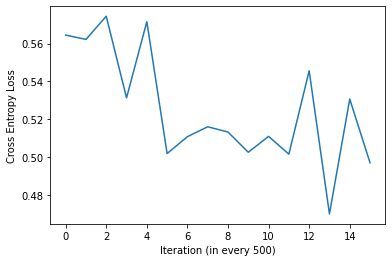

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (losList)
plt.plot(losList)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

[75.28935185185185, 75.28935185185185, 75.28935185185185, 76.50462962962963, 76.04166666666667, 76.27314814814815, 75.92592592592592, 75.57870370370371, 76.44675925925925, 75.69444444444444, 76.27314814814815, 75.57870370370371, 76.44675925925925, 76.79398148148148, 76.21527777777777, 75.57870370370371]


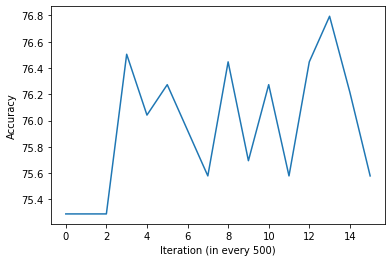

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (accuracyList)
plt.plot(accuracyList)
plt.ylabel('Accuracy')
plt.xlabel('Iteration (in every 500)')
plt.show()

# **Accuracy of the model on the Test Set**

In [ ]:
testDataset.shape


(1884, 13)

In [ ]:
NormalizedDataset = np.float32(testDataset.loc[:, testDataset.columns != "target"].values)

In [ ]:
NormalizedDataset.shape

(1884, 12)

In [ ]:
test_data = NormalizedDataset

In [ ]:
labels = testDataset.target.values

In [ ]:
labels.shape

(1884,)

In [ ]:
test_label = labels

In [ ]:
testDataset.shape

test_data = torch.from_numpy(test_data)
test_label = torch.from_numpy(test_label).type(torch.LongTensor)

test = torch.utils.data.TensorDataset(test_data, test_label)

test_loader = torch.utils.data.DataLoader(dataset=test, 
                                          batch_size=batch_size, 
                                          shuffle=False) 


In [ ]:
# Calculate Accuracy         
correct = 0
total = 0
# Iterate through test dataset
for images, labels in test_loader:
               
  images = images.view(-1, 12).to(device)

  # Forward pass only to get logits/output
  outputs = model(images)

  # Get predictions from the maximum value
  _, predicted = torch.max(outputs, 1)

  # Total number of labels
  total += labels.size(0)


                # Total correct predictions
  if torch.cuda.is_available():
    correct += (predicted.cpu() == labels.cpu()).sum() 
  else:
    correct += (predicted == labels).sum()

accuracy = 100 * correct.item() / total
print(' Loss: {}. Accuracy: {}'.format( loss.item(), accuracy))



 Loss: 0.48671749234199524. Accuracy: 76.2208067940552
